# Titanic Project Capstone
## Introduction and Foundations to machine learning
## Project: Titanic Survival Exploration and ML classifier
    
<p>In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In February 2019 the dataset of the passagers we're released on wikipedia <a href = https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic>Titanic passenger list</a>. </p><br>
    In this project, we will explore RMS Titanic passenger manifest, try to see some patterns in the given data and determine which features best predict whether someone survived or did not survive with some machine learning classifiers.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data info

<ul>
<li>PassengerId = passenger id</li>
<li>Pclass = 1(1st), 2(2nd), 3(3rd)</li>
<li>Sex = male or female</li>
<li>SibSp = # of siblings / spouses aboard the Titanic</li>
<li>Parch = # of parents / children aboard the Titanic</li>
<li>Ticket = ticket number</li>
<li>Fare = Passenger fare</li>
<li>Cabin = cabin number</li>
<li>Embarked = port of embarkation / C = Cherbourg, Q = Queenstown, S = Southampton</li>
<li>wikiId</li>   
<li>Name = passenger name</li> 
<li>Age = age in years</li>
<li>Hometown </li>
<li>Destination</li>
<li>Lifeboat</li>
<li>Body</li>   
<li>Survived = 0(no) or 1(yes)</li>
   
  
</ul>


## Importing Data and Data Cleaning

In [2]:
data = pd.read_csv('titanic_full.csv')
data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body,Survived
0,1,3,male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,0
1,2,1,female,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1
2,3,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,1
3,4,1,female,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1
4,5,3,male,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,0


### Exploring the dataset

#### Columns names and columns indexes

In [3]:
columns = data.columns
for index, item in enumerate(columns):
    print(index,item)
print("")    
print('There are {} columns in titanic dataset'.format(len(columns)))

0 PassengerId
1 Pclass
2 Sex
3 SibSp
4 Parch
5 Ticket
6 Fare
7 Cabin
8 Embarked
9 WikiId
10 Name
11 Age
12 Hometown
13 Boarded
14 Destination
15 Lifeboat
16 Body
17 Survived

There are 18 columns in titanic dataset


### Observing missing values and columns datatypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
WikiId         1304 non-null float64
Name           1304 non-null object
Age            1302 non-null float64
Hometown       1304 non-null object
Boarded        1304 non-null object
Destination    1304 non-null object
Lifeboat       502 non-null object
Body           130 non-null object
Survived       1309 non-null int64
dtypes: float64(3), int64(5), object(10)
memory usage: 184.2+ KB


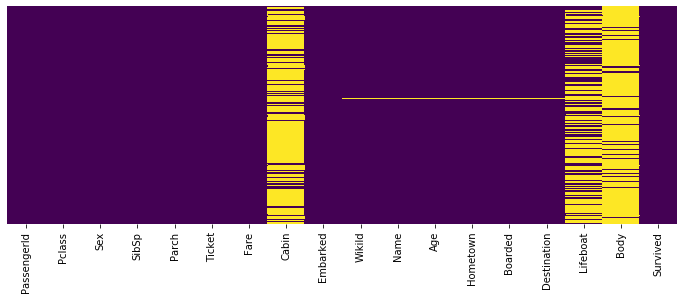

In [5]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

note1 : yellow spaces are missing datapoints

In [6]:
data['Age'] = data['Age'].astype(int, errors = 'ignore')

### Removing columns with 80% of missing data

In [7]:
thresh = 0.8
for element in data.columns:
    if data[element].count() < len(data['PassengerId'])*thresh:
        del data[element]
        print('%s column was removed from dataset '%(element))

Cabin column was removed from dataset 
Lifeboat column was removed from dataset 
Body column was removed from dataset 


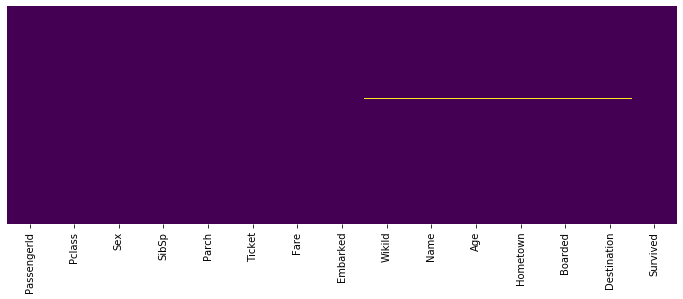

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Obs: yellow spaces are missing datapoints

In [9]:
data.dropna(inplace = True)

In [10]:
data['Age'] = data['Age'].astype(np.int)

## Data Visualization 

#### Count plot 

Text(0.5, 1.0, 'Survived counts')

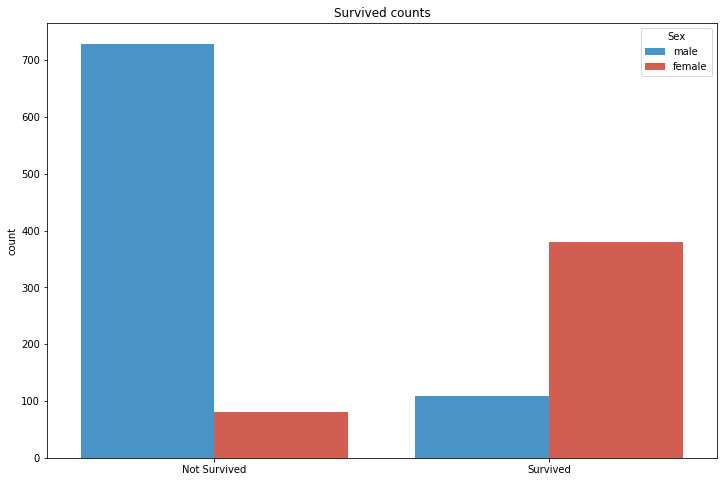

In [11]:
plt.figure(figsize=(12,8))
colors = ["#3498db", "#e74c3c"]
sns.set_palette(colors)
sns.countplot(data['Survived'], hue = data['Sex'] )
plt.xticks(np.arange(0,2),('Not Survived', 'Survived'))
plt.xlabel(" ")
plt.title('Survived counts')

In [12]:
mask1 = data['Sex']=='male'
mask2 = data['Sex'] == 'female'
mask3 = data['Survived'] == 0
mask4 = data['Survived'] == 1

male_died = len(data[mask1 & mask3])
male_survived = len(data[mask1 & mask4])
male_total = len(data[mask1])

female_died = len(data[mask2 & mask3])
female_survived = len(data[mask2 & mask4])
female_total = len(data[mask2])

print('%i (%.2f ptc) of %i passengers are males' %(male_total, male_total/(male_total+female_total)*100,male_total+female_total))
print('%i (%.2f ptc) of %i passengers are females' %(female_total, female_total/(male_total+female_total)*100,male_total+female_total))

print(" ")
print('%i (%.2f pct) males in that ship did not survived and %i (%.2f pct) survived ' %(male_died,male_died/male_total*100,male_survived , male_survived/male_total*100 ))
print('%i (%.2f pct) females in that ship did not survived and %i (%.2f pct) survived ' %(female_died,female_died/female_total*100,female_survived ,female_survived/female_total*100))


838 (64.51 ptc) of 1299 passengers are males
461 (35.49 ptc) of 1299 passengers are females
 
729 (86.99 pct) males in that ship did not survived and 109 (13.01 pct) survived 
81 (17.57 pct) females in that ship did not survived and 380 (82.43 pct) survived 


note 1 : We can see that there's a difference in survival statistics and females aboard the ship had 82.43% survival rate and men had only 13.01% survival rate 

In [13]:
#Adjusting seaborn collor palette , https://www.codecademy.com/articles/seaborn-design-ii
pal = sns.color_palette('OrRd')
pal.as_hex()

['#fee5c3', '#fdcd96', '#fda872', '#f4764f', '#de3f2b', '#b80604']

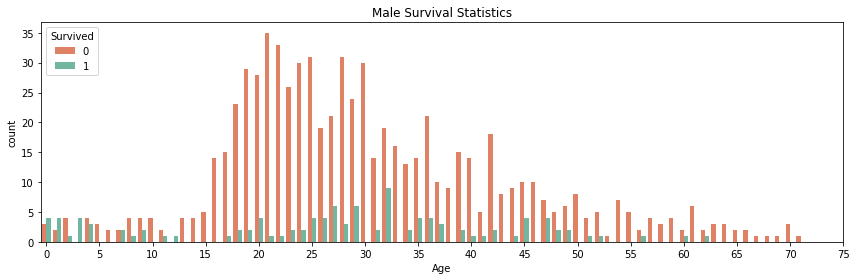

In [14]:
plt.figure(figsize=(12,4))
color_d = ['#f4764f','#66c2a5']
sns.set_palette(color_d)

sns.countplot(data[data['Sex'] == 'male']['Age'], hue = data['Survived'] )
plt.xticks(np.arange(0,80, 5), (np.arange(0,80,5)))
plt.xlabel("Age")
plt.title('Male Survival Statistics')
plt.tight_layout()

note 2 : there's a peak in deaths of males between 15 and 35

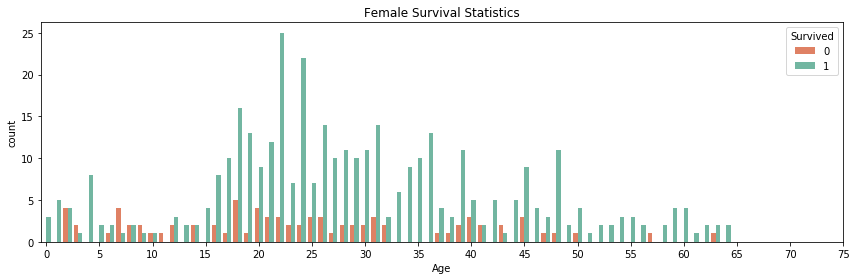

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(data[data['Sex'] == 'female']['Age'], hue = data['Survived'] )
plt.xticks(np.arange(0,80, 5), (np.arange(0,80,5)))
plt.xlabel("Age")
plt.title('Female Survival Statistics')
plt.tight_layout()

note 3 : there's a peak in deaths of females between 15 and 36

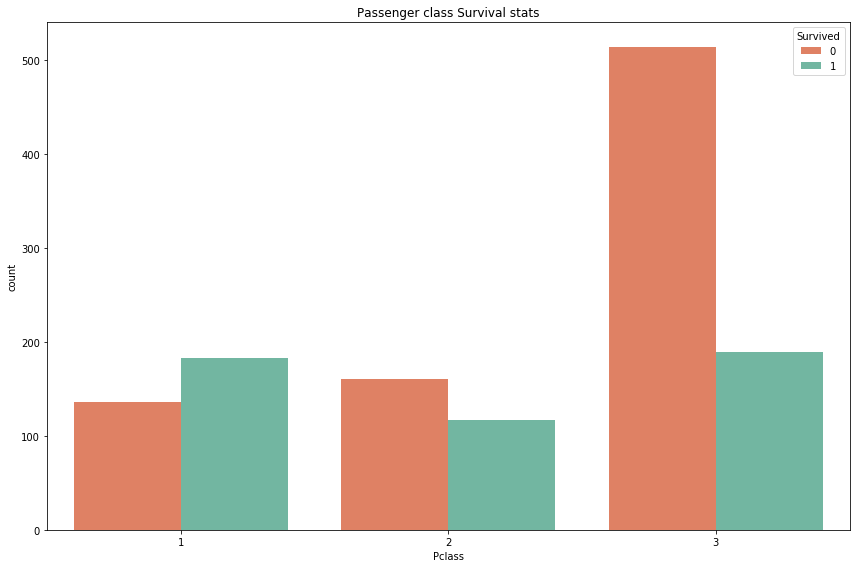

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(data['Pclass'], hue = data['Survived'] )
#plt.xticks(np.arange(0,80, 5), (np.arange(0,80,5)))
#plt.xlabel("Age")
plt.title('Passenger class Survival stats')
plt.tight_layout()

In [17]:
mask1 = data['Sex']=='male'
mask2 = data['Sex'] == 'female'
mask3 = data['Survived'] == 0
mask4 = data['Survived'] == 1

mask8 = data['Pclass'] == 1
mask9 = data['Pclass'] == 2
mask10 = data['Pclass'] == 3

#males and females 1th class
print('Stats for 1th class:')
print('males:')
print('there are %i males, %i survived, %i didn\'t survived' %(len(data[mask1 & mask8]), len(data[mask1 & mask8  &mask4]), len(data[mask1 & mask8  &mask3]))) 
print('females:')
print('there are %i females, %i survived, %i didn\'t survived' %(len(data[mask2 & mask8]), len(data[mask2 & mask8  &mask4]), len(data[mask2 & mask8  &mask3]))) 
print(" ")
#males and females 2nd class
print('Stats for 2nd class:')
print('males:')
print('there are %i males, %i survived, %i didn\'t survived' %(len(data[mask1 & mask9]), len(data[mask1 & mask9  &mask4]), len(data[mask1 & mask9  &mask3]))) 
print('females:')
print('there are %i females, %i survived, %i didn\'t survived' %(len(data[mask2 & mask9]), len(data[mask2 & mask9 &mask4]), len(data[mask2 & mask9  &mask3]))) 
print(" ")

#males and females 3rd class

print('Stats for 3nd class:')
print('males:')
print('there are %i males, %i survived, %i didn\'t survived' % (len(data[mask1 & mask10]), len(data[mask1 & mask10  &mask4]), len(data[mask1 & mask10  &mask3]))) 
print('females:')
print('there are %i females, %i survived, %i didn\'t survived' % (len(data[mask2 & mask10]), len(data[mask2 & mask10 &mask4]), len(data[mask2 & mask10  &mask3]))) 
print(" ")

d3c = len(data[mask2 & mask10  &mask3])/len(data[mask2 & mask3])
t_d = len(data[mask3 & mask10])/len(data[mask3])

print('%.2f passengers did not survived we\'re in the 3rd class' % (t_d))

print('%.2f females did not survived we\'re in the 3rd class' % (d3c))



Stats for 1th class:
males:
there are 178 males, 45 survived, 133 didn't survived
females:
there are 141 females, 138 survived, 3 didn't survived
 
Stats for 2nd class:
males:
there are 171 males, 17 survived, 154 didn't survived
females:
there are 106 females, 100 survived, 6 didn't survived
 
Stats for 3nd class:
males:
there are 489 males, 47 survived, 442 didn't survived
females:
there are 214 females, 142 survived, 72 didn't survived
 
0.63 passengers did not survived we're in the 3rd class
0.89 females did not survived we're in the 3rd class


note 4: 63% of passengers that didn't survived we're in the 3rd class<br>
note 5: 88% of woman that didn't survived we're in the 3rd class

## Machine Learning Classifiers 

### Splitting the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop(['PassengerId','Survived','Ticket','WikiId','Name','Hometown','Embarked','Destination'], axis =1)
y = data['Survived']

In [20]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Boarded
0,3,male,1,0,7.2500,22,Southampton
1,1,female,1,0,71.2833,35,Cherbourg
2,3,female,0,0,7.9250,26,Southampton
3,1,female,1,0,53.1000,35,Southampton
4,3,male,0,0,8.0500,35,Southampton


Notice that **Sex** and **Boarded** columns are categorical columns, we need to transform them using dummy variables

In [21]:
X_final = pd.get_dummies(X, columns =['Sex','Boarded'], drop_first=True)
X_final.head()

,Pclass,SibSp,Parch,Fare,Age,Sex_male,Boarded_Cherbourg,Boarded_Queenstown,Boarded_Southampton
0,3,1,0,7.2500,22,1,0,0,1
1,1,1,0,71.2833,35,0,1,0,0
2,3,0,0,7.9250,26,0,0,0,1
3,1,1,0,53.1000,35,0,0,0,1
4,3,0,0,8.0500,35,1,0,0,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=30)

## KNN  Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#### Choosing K value

In [24]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
print(min(error_rate))

0.3123543123543124


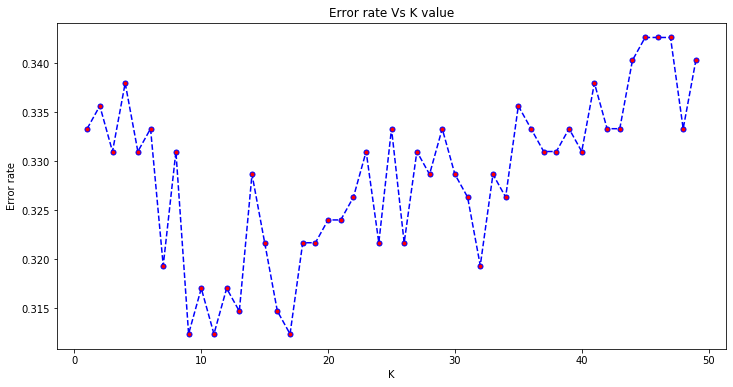

In [26]:
plt.figure(figsize = (12,6))

plt.plot(range(1,50), error_rate,
        color='blue',
        ls='dashed',
        marker='o',
        markerfacecolor='red',
        markersize=5)
plt.title('Error rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error rate');

note 6: we have got a 31% of error rate, without scaling the variables.

#### Grid Search CV to try to boost the classifier

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid ={'n_neighbors':range(1,25),'algorithm': ['auto','kd_tree','brute','ball_tree']}

In [29]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 3)

In [30]:
grid.fit(X_train, y_train)

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] ....... algorithm=auto, n_neighbors=1, score=0.629, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] ....... algorithm=auto, n_neighbors=1, score=0.624, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] ....... algorithm=auto, n_neighbors=1, score=0.619, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] ....... algorithm=auto, n_neighbors=2, score=0.677, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] ....... algorithm=auto, n_neighbors=2, score=0.679, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] ....... algorithm=auto, n_neighbors=2, score=0.661, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] ....... al

[CV] ...... algorithm=auto, n_neighbors=21, score=0.649, total=   0.0s
[CV] algorithm=auto, n_neighbors=21 ..................................
[CV] ...... algorithm=auto, n_neighbors=21, score=0.655, total=   0.0s
[CV] algorithm=auto, n_neighbors=21 ..................................
[CV] ...... algorithm=auto, n_neighbors=21, score=0.668, total=   0.0s
[CV] algorithm=auto, n_neighbors=22 ..................................
[CV] ...... algorithm=auto, n_neighbors=22, score=0.649, total=   0.0s
[CV] algorithm=auto, n_neighbors=22 ..................................
[CV] ...... algorithm=auto, n_neighbors=22, score=0.659, total=   0.0s
[CV] algorithm=auto, n_neighbors=22 ..................................
[CV] ...... algorithm=auto, n_neighbors=22, score=0.675, total=   0.0s
[CV] algorithm=auto, n_neighbors=23 ..................................
[CV] ...... algorithm=auto, n_neighbors=23, score=0.646, total=   0.0s
[CV] algorithm=auto, n_neighbors=23 ..................................
[CV] .

[CV] algorithm=kd_tree, n_neighbors=16 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=16, score=0.661, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=17, score=0.653, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=17, score=0.683, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=17, score=0.651, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=18 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=18, score=0.660, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=18 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=18, score=0.676, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=18 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=18, score=0.654, total=   0.0s
[CV] a

[CV] ..... algorithm=brute, n_neighbors=14, score=0.657, total=   0.0s
[CV] algorithm=brute, n_neighbors=15 .................................
[CV] ..... algorithm=brute, n_neighbors=15, score=0.656, total=   0.0s
[CV] algorithm=brute, n_neighbors=15 .................................
[CV] ..... algorithm=brute, n_neighbors=15, score=0.676, total=   0.0s
[CV] algorithm=brute, n_neighbors=15 .................................
[CV] ..... algorithm=brute, n_neighbors=15, score=0.664, total=   0.0s
[CV] algorithm=brute, n_neighbors=16 .................................
[CV] ..... algorithm=brute, n_neighbors=16, score=0.646, total=   0.0s
[CV] algorithm=brute, n_neighbors=16 .................................
[CV] ..... algorithm=brute, n_neighbors=16, score=0.683, total=   0.0s
[CV] algorithm=brute, n_neighbors=16 .................................
[CV] ..... algorithm=brute, n_neighbors=16, score=0.661, total=   0.0s
[CV] algorithm=brute, n_neighbors=17 .................................
[CV] .

[CV] . algorithm=ball_tree, n_neighbors=13, score=0.679, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=13 .............................
[CV] . algorithm=ball_tree, n_neighbors=13, score=0.671, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14 .............................
[CV] . algorithm=ball_tree, n_neighbors=14, score=0.643, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14 .............................
[CV] . algorithm=ball_tree, n_neighbors=14, score=0.676, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14 .............................
[CV] . algorithm=ball_tree, n_neighbors=14, score=0.657, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15 .............................
[CV] . algorithm=ball_tree, n_neighbors=15, score=0.656, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15 .............................
[CV] . algorithm=ball_tree, n_neighbors=15, score=0.676, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'kd_tree', 'brute', 'ball_tree'],
                         'n_neighbors': range(1, 25)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [31]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 11}

In [32]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#### KNN Evaluation 

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
grid_predictions = grid.predict(X_test)

In [35]:
print(classification_report(y_test,grid_predictions))
print(" ")
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       268
           1       0.61      0.47      0.53       161

    accuracy                           0.69       429
   macro avg       0.66      0.64      0.65       429
weighted avg       0.68      0.69      0.68       429

 
[[220  48]
 [ 86  75]]


## Random Forests Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

#### Choosing n_estimators value

In [37]:
error_rate = []
for i in range(1,300):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

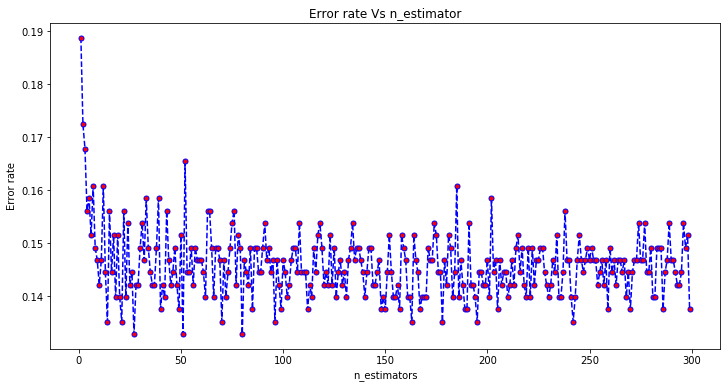

In [38]:
plt.figure(figsize = (12,6))

plt.plot(range(1,300), error_rate,
        color='blue',
        ls='dashed',
        marker='o',
        markerfacecolor='red',
        markersize=5)
plt.title('Error rate Vs n_estimator')
plt.xlabel('n_estimators')
plt.ylabel('Error rate');

In [39]:
print(min(error_rate))

0.13286713286713286


In [40]:
for i, item in enumerate(error_rate[0:50]):
    if item == min(error_rate):
        print(i)

26


note 7 : there's only one variable in study (n_estimator), so just this method will be ok to build a good Rando forest classifier

In [41]:
rfc = RandomForestClassifier(n_estimators=21)

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Randon Forest Classifier Evaluation

In [43]:
rfc_predictions = rfc.predict(X_test)

In [44]:
print(classification_report(y_test, rfc_predictions))
print(" ")
print(confusion_matrix(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       268
           1       0.78      0.84      0.81       161

    accuracy                           0.85       429
   macro avg       0.84      0.85      0.85       429
weighted avg       0.86      0.85      0.85       429

 
[[230  38]
 [ 25 136]]


## Support Vector Machine Classifier

In [45]:
from sklearn.svm import SVC

#### Estimating best Classifier paramethers 

In [46]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001]}

In [47]:
grid_SVM = GridSearchCV(SVC(), param_grid, verbose = 3)

In [48]:
grid_SVM.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.622, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.623, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.622, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.623, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [49]:
grid_SVM.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
grid_SVM.best_params_

{'C': 1000, 'gamma': 0.0001}

#### SVM Classifier Evaluation

In [51]:
grid_SVM_predict = grid_SVM.predict(X_test)

In [52]:
print(classification_report(y_test, grid_SVM_predict))
print(' ')
print(confusion_matrix(y_test, grid_SVM_predict))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       268
           1       0.85      0.83      0.84       161

    accuracy                           0.88       429
   macro avg       0.87      0.87      0.87       429
weighted avg       0.88      0.88      0.88       429

 
[[244  24]
 [ 28 133]]


note 8 : the best evaluation score so far 

## KNN Standardizing the variables

let's see how a clustering method performs in this dataset

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

In [55]:
scaler_train.fit(X_train)
scaler_test.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
X_train_transformed = scaler_train.transform(X_train)
X_test_transformed = scaler_test.transform(X_test)

### Selecting the best k value

In [57]:
param_grid ={'n_neighbors':range(1,25),'algorithm': ['auto','kd_tree','brute','ball_tree']}

In [58]:
grid_knn_std = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 3)

In [59]:
grid_knn_std.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] ....... algorithm=auto, n_neighbors=1, score=0.749, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] ....... algorithm=auto, n_neighbors=1, score=0.779, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] ....... algorithm=auto, n_neighbors=1, score=0.796, total=   0.0s

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] ....... algorithm=auto, n_neighbors=2, score=0.773, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] ....... algorithm=auto, n_neighbors=2, score=0.803, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] ....... algorithm=auto, n_neighbors=2, score=0.792, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] ....... algorithm=auto, n_neighbors=3, score=0.814, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] ....... algorithm=auto, n_neighbors=3, score=0.834, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] ....... algorithm=auto, n_neighbors=3, score=0.806, total=   0.0s
[CV] algorithm=auto, n_neighbors=4 ...................................
[CV] ....... algorithm=auto, n_neighbors=4, score=0.821, total=   0.0s
[CV] 

[CV] ...... algorithm=auto, n_neighbors=24, score=0.811, total=   0.0s
[CV] algorithm=auto, n_neighbors=24 ..................................
[CV] ...... algorithm=auto, n_neighbors=24, score=0.848, total=   0.0s
[CV] algorithm=auto, n_neighbors=24 ..................................
[CV] ...... algorithm=auto, n_neighbors=24, score=0.830, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1 ................................
[CV] .... algorithm=kd_tree, n_neighbors=1, score=0.749, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1 ................................
[CV] .... algorithm=kd_tree, n_neighbors=1, score=0.779, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1 ................................
[CV] .... algorithm=kd_tree, n_neighbors=1, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=2 ................................
[CV] .... algorithm=kd_tree, n_neighbors=2, score=0.773, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=2 ................................
[CV] .

[CV] ... algorithm=kd_tree, n_neighbors=19, score=0.831, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=19, score=0.837, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=20 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=20, score=0.811, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=20 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=20, score=0.852, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=20 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=20, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=21 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=21, score=0.814, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=21 ...............................
[CV] ... algorithm=kd_tree, n_neighbors=21, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=21 ...............................
[CV] .

[CV] ..... algorithm=brute, n_neighbors=16, score=0.811, total=   0.0s
[CV] algorithm=brute, n_neighbors=16 .................................
[CV] ..... algorithm=brute, n_neighbors=16, score=0.845, total=   0.0s
[CV] algorithm=brute, n_neighbors=16 .................................
[CV] ..... algorithm=brute, n_neighbors=16, score=0.844, total=   0.0s
[CV] algorithm=brute, n_neighbors=17 .................................
[CV] ..... algorithm=brute, n_neighbors=17, score=0.814, total=   0.0s
[CV] algorithm=brute, n_neighbors=17 .................................
[CV] ..... algorithm=brute, n_neighbors=17, score=0.834, total=   0.0s
[CV] algorithm=brute, n_neighbors=17 .................................
[CV] ..... algorithm=brute, n_neighbors=17, score=0.837, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] ..... algorithm=brute, n_neighbors=18, score=0.818, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .

[CV] . algorithm=ball_tree, n_neighbors=11, score=0.855, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11 .............................
[CV] . algorithm=ball_tree, n_neighbors=11, score=0.848, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=12 .............................
[CV] . algorithm=ball_tree, n_neighbors=12, score=0.832, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=12 .............................
[CV] . algorithm=ball_tree, n_neighbors=12, score=0.848, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=12 .............................
[CV] . algorithm=ball_tree, n_neighbors=12, score=0.841, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=13 .............................
[CV] . algorithm=ball_tree, n_neighbors=13, score=0.818, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=13 .............................
[CV] . algorithm=ball_tree, n_neighbors=13, score=0.841, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=13 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'kd_tree', 'brute', 'ball_tree'],
                         'n_neighbors': range(1, 25)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [60]:
grid_knn_std.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [61]:
grid_knn_std.best_params_

{'algorithm': 'auto', 'n_neighbors': 11}

In [62]:
grid_knn_std.best_score_

0.8436781609195402

#### Evaluating the model 

In [63]:
grid_knn_std_pred = grid_knn_std.predict(X_test_transformed)

In [64]:
print(classification_report(y_test,grid_knn_std_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       268
           1       0.84      0.83      0.83       161

    accuracy                           0.87       429
   macro avg       0.87      0.86      0.87       429
weighted avg       0.87      0.87      0.87       429



note 9: knn performed better when the data is standardized

### Reevaluation of Randon forest classifier

In [65]:
error_rate = []
for i in range(1,300):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train_transformed,y_train)
    pred_i = rfc.predict(X_test_transformed)
    error_rate.append(np.mean(pred_i != y_test))

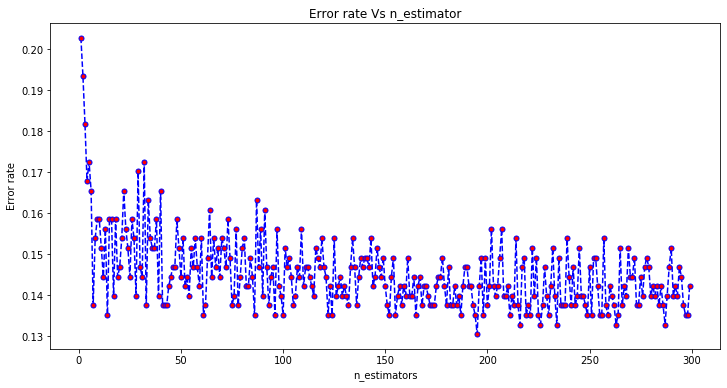

In [66]:
plt.figure(figsize = (12,6))

plt.plot(range(1,300), error_rate,
        color='blue',
        ls='dashed',
        marker='o',
        markerfacecolor='red',
        markersize=5)
plt.title('Error rate Vs n_estimator')
plt.xlabel('n_estimators')
plt.ylabel('Error rate');

#### Evaluating the model

In [67]:
for index, error in enumerate(error_rate):
    if  min(error_rate) == error:
        print(index)

194


In [68]:
rfc = RandomForestClassifier(n_estimators=41)
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rfc_predict_transformed = rfc.predict(X_test_transformed)

In [70]:
print(classification_report(y_test, rfc_predict_transformed))
print(" ")
print(confusion_matrix(y_test, rfc_predict_transformed))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       268
           1       0.80      0.81      0.81       161

    accuracy                           0.85       429
   macro avg       0.84      0.85      0.84       429
weighted avg       0.85      0.85      0.85       429

 
[[235  33]
 [ 30 131]]
